In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import b_value_functions1 as b_value_functions # these are the functions in the .py file 
from datetime import datetime

In [2]:
# Read in the example catalog 
catalogT = pd.read_csv("D:\Yihe\Louis_CorinthData\OtherEQCatalogs\BALE_2019Better_6000events_induced\Basel 2006-2018 Herrman Supplement.csv")
#print(catalog)

In [3]:
# Read in the example catalog 
catalog1 = pd.read_csv("D:\Yihe\Louis_CorinthData\OtherEQCatalogs\BALE_2019Better_6000events_induced\Basel TPID.csv")
#print(catalog1)

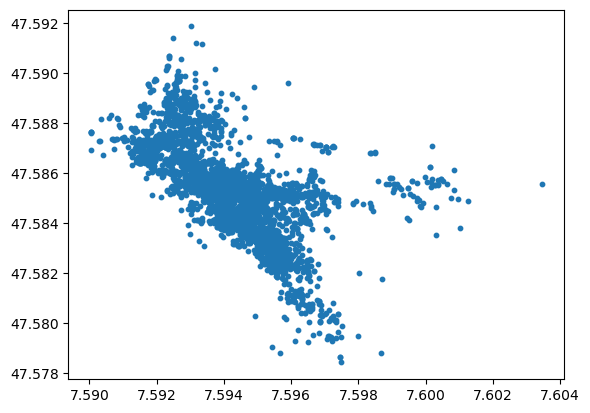

In [4]:
# convert xyz to int, lat/lon to float, and cut TPID
X=[]
Y=[]
Z=[]
lat=[]
lon=[]
dep=[]
tpid=[]
Mw=[]
DT=[]

for x in range(len(catalog1["SourceDateTime"])):
    if catalog1["X"][x]!="---" and catalog1["Y"][x]!="---" and catalog1["Z"][x]!="---":
        X.append(int(catalog1["X"][x]))
        Y.append(int(catalog1["Y"][x]))
        Z.append(int(catalog1["Z"][x]))
        lat.append(float(catalog1["Lat"][x]))
        lon.append(float(catalog1["Lon"][x]))
        dep.append(float(catalog1["Dep"][x]))
        if catalog1["Mwx"][x]!="-.--":
            Mw.append(float(catalog1["Mwx"][x]))
        else:
            Mw.append(-10.0)
        temp=catalog1["TpID"][x].split('p')
        if temp[0]=="------":
            tpid.append(0)
        else:
            tpid.append(int(temp[1]))
        dtTemp = catalog1["SourceDateTime"][x].split('T')
        dTemp = dtTemp[0].split('-')
        ttemp = dtTemp[1].split(':')
        DT.append(datetime(int(dTemp[0]),int(dTemp[1]),int(dTemp[2]),int(ttemp[0]),int(ttemp[1]),int(float(ttemp[2]))))
    
#print(tpid)

plt.scatter(lon,lat,s=10)
plt.show()

In [5]:
# Create a radius from well-head
R=np.sqrt(np.square(X)+np.square(Y)+np.square(Z))

# create tpref which is a referential array where tpref[num] gives the index of that num in the locational dataset
tpref=[0]*2509

for x in range(len(tpid)):
    tpref[tpid[x]]=x
    
hsLat=[]
hsLon=[]
hsDep=[]
hX=[]
hY=[]
hZ=[]
hDT=[]
hsMw=[]

#len(catalog["CCC"]
for x in range(len(catalogT["CCC"])):
    if float(catalogT["CCC"][x])>=0.5:
        sDate=catalogT["Date"][x].split('-')
        sTime=catalogT["Time"][x].split(':')
        hDT.append(datetime(int(sDate[0]),int(sDate[1]),int(sDate[2]),int(sTime[0]),int(sTime[1]),int(float(sTime[2]))))
        #print(tpref[catalog["TpID"][x]],x)
        hsLat.append(lat[tpref[catalogT["TpID"][x]]])
        hsLon.append(lon[tpref[catalogT["TpID"][x]]])
        hsDep.append(dep[tpref[catalogT["TpID"][x]]])
        hX.append(X[tpref[catalogT["TpID"][x]]])
        hY.append(Y[tpref[catalogT["TpID"][x]]])
        hZ.append(Z[tpref[catalogT["TpID"][x]]])
        hsMw.append(catalogT["Mwx"][x])
        
hR=np.sqrt(np.square(hX)+np.square(hY)+np.square(hZ))

In [10]:
# Inj St  grndTST? datetime(2006,12,2,17,12)
# Inj End 12.95616898148148 2006-12-08 10:32:59

injSt = datetime(2006,12,2,17,12).timestamp()/86400.0
injEnd = datetime(2006,12,8,10,32,59).timestamp()/86400.0 - injSt
print(injEnd)

dt = [x.timestamp()/86400.0 - injSt for x in hDT]

# Filters all arrays according to injection start and end dates, chatgpt assisted
dtF, magF, xf, yf, depf,  = zip(*[
    (d, m, x, y, dp)
    for d, m, x, y, dp in zip(dt, hsMw, hX, hY, hZ)
    if injSt-injSt <= d <= injEnd and m>=-9
])
print(len(magF),len(dt))

5.722905092592555
159706 221160


In [11]:
import statistics
xref = statistics.median(xf[0:10])
yref = statistics.median(yf[0:10])
zref = statistics.median(depf[0:10])
print(xref,yref,zref)

-8.0 -54.0 -63.0


In [12]:
hR=np.sqrt((np.array(xf)-xref)**2+(np.array(yf)-yref)**2+(np.array(depf)-zref)**2)

In [36]:
print(len(hsMw))

221160


In [37]:
#Limit to injection period
# 12.95616898148148
# stDat= datetime(2006,11,25,11,36,6)
#rdtrNew = [(dt-stDat).total_seconds()/86400.0 for dt in rdtr]
stDt = datetime(2006,11,25,11,36,6)
hDTTmp = [(dt-stDt).total_seconds()/86400.0 for dt in hDT]

hDTN=[]
hMwN=[]
hRN=[]
for i in range(len(hDTTmp)):
    if hDTTmp[i] < 12.95616898148148:
        hDTN.append(hDTTmp[i])
        hMwN.append(hsMw[i])
        hRN.append(hR[i])

In [7]:
trc=0
print()
for x in range(len(hDT)):
    if hsMw[x] == 3.14:
        trc = hR[x]
print(trc)


233.43307392055652


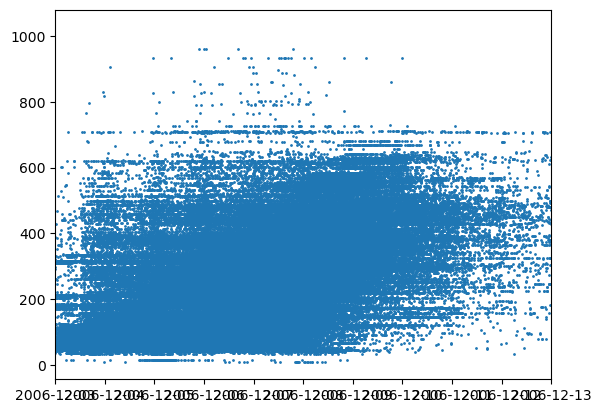

In [8]:
R1=np.sqrt(np.square(hX)+np.square(hY)+np.square(hZ))
plt.scatter(hDT,R1,s=1)
plt.xlim([datetime(2006,12,3),datetime(2006,12,13)])
plt.show()

<class 'tuple'>


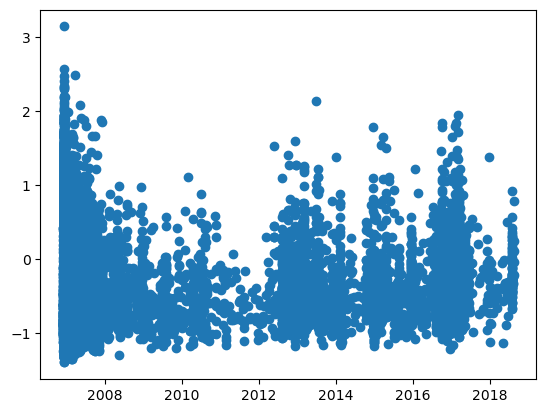

In [9]:
# Generated with ChatGPT, remove false Mags (the ones assigned Mw = -10)

# Filtering out elements that meet certain qualifications in the first array and the corresponding indices from all arrays
filtered_arrays = list(zip(*[
    [a, b, c, d, e, f, g, h] for a, b, c, d, e, f, g, h in zip(hR, dtF, magF)
    if g >= -9
]))

# Unzipping the filtered results
X, Y, Z, lat, lon, dep, Mw, DT = filtered_arrays

plt.scatter(DT,Mw)
print(type(X))

<class 'tuple'>


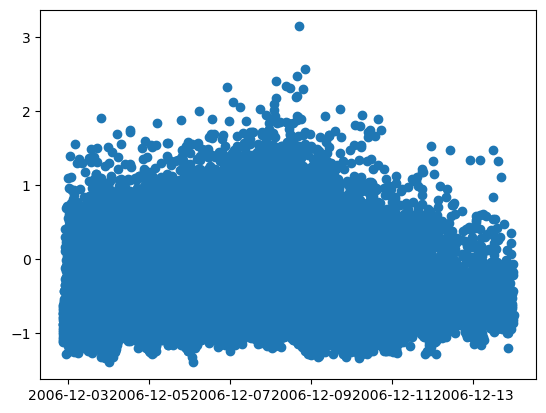

In [10]:
# Generated with ChatGPT, only preserve times between 12/1 00:00 and 12/14 00:00

# Filtering out elements that meet certain qualifications in the first array and the corresponding indices from all arrays
filtered_arrays = list(zip(*[
    [a, b, c, d, e, f, g, h] for a, b, c, d, e, f, g, h in zip(X, Y, Z, lat, lon, dep, Mw, DT)
    if h >= datetime(2006,12,1) and h <= datetime(2006,12,14)
]))

# Unzipping the filtered results
Xt, Yt, Zt, latt, lont, dept, Mwt, DTt = filtered_arrays

plt.scatter(DTt,Mwt)
print(type(X))

In [11]:
#Conversion back to lists
X=list(Xt)
Y=list(Yt)
Z=list(Zt)
lat=list(latt)
lon=list(lont)
dep=list(dept)
Mw=list(Mwt)
DT=list(DTt)

In [12]:
print(DT[10000])

2006-12-03 18:57:03


In [13]:
#create reference 0 distance based of median of first 10 event locations
import statistics
xref = statistics.median(X[0:10])
yref = statistics.median(Y[0:10])
zref = statistics.median(Z[0:10])
print(xref,yref,zref)

-8.0 -54.0 -63.0


In [13]:
# bin stuff
bins = np.arange(-2, 6, 0.1)
mid_bins = (bins[:-1] + bins[1:])/2

In [14]:
def quicksort_with_swaps(arr1, arr2, low, high):
    if low < high:
        # Partition the arrays and get the pivot index
        pivot_index = partition(arr1, arr2, low, high)

        # Recursively sort the subarrays on both arrays
        quicksort_with_swaps(arr1, arr2, low, pivot_index)
        quicksort_with_swaps(arr1, arr2, pivot_index + 1, high)

def partition(arr1, arr2, low, high):
    # Choose the pivot as the middle element
    pivot = arr1[(low + high) // 2]
    i = low - 1
    j = high + 1

    while True:
        i += 1
        while arr1[i] < pivot:
            i += 1

        j -= 1
        while arr1[j] > pivot:
            j -= 1

        if i >= j:
            return j

        # Swap elements in both arrays
        arr1[i], arr1[j] = arr1[j], arr1[i]
        arr2[i], arr2[j] = arr2[j], arr2[i]

# Example usage:
array1 = [3, 1, 4, 1, 5, 9, 2, 6]
array2 = ['c', 'a', 'd', 'a', 'e', 'i', 'b', 'f']

quicksort_with_swaps(array1, array2, 0, len(array1) - 1)

print("Sorted array1:", array1)
print("Corresponding sorted array2:", array2)

def quicksort(arr):
    if len(arr) <= 1:
        return arr
    
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    
    return quicksort(left) + middle + quicksort(right)

Sorted array1: [1, 1, 2, 3, 4, 5, 6, 9]
Corresponding sorted array2: ['a', 'a', 'b', 'c', 'd', 'e', 'f', 'i']


In [15]:
print(len(magF))

159706


In [17]:
print(len(hR))

159706


In [18]:
dist = hR.copy()

In [19]:
# Sort array based on 90th percentile mimicking method from Danre et al 2022
# find 90th percentile and above for every 50 events, build 4 array (percentile and non percentile)
percM =[]
percT =[]
percD=[]
rstM =[]
rstT =[]
rstD =[]

hDTN = np.array(dtF)
hRN = hR.copy()
hMwN = np.array(magF)

for z in range(50,len(hDTN)-50,50):
    #print(i,len(catalog["Time"]))
    #print(z)
    subDist=np.array(hRN[z-50:z].copy())
    subTime=np.array(hDTN[z-50:z].copy())
    subDstRef=[x for x in range(z-50,z)]
    quicksort_with_swaps(subDist, subDstRef, 0, len(subDist)-1)
    
    pM=[]
    pT=[]
    pD=[]
    rM=[]
    rT=[]
    rD=[]
    for y in range(50):
        if y<45:
            rM.append(hMwN[subDstRef[y]])
            rT.append(hDTN[subDstRef[y]])
            rstD.append(hRN[subDstRef[y]])
        if y>=45:
            pM.append(hMwN[subDstRef[y]])
            pT.append(hDTN[subDstRef[y]])
            pD.append(hRN[subDstRef[y]])
    percM += pM
    percT += pT
    percD += pD
    rstM += rM
    rstT += rT
    rstD += rD

In [20]:
print(len(rstM))

143685


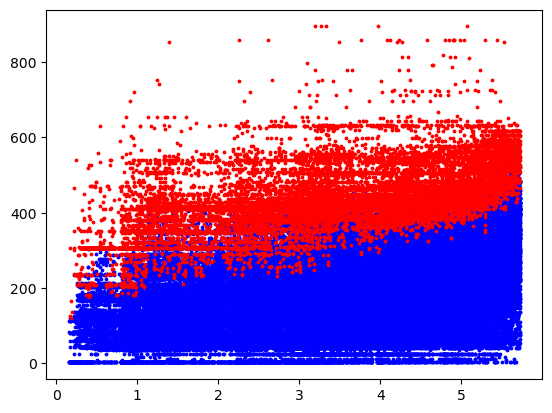

In [21]:
plt.scatter(rstT,rstD,c='b',s=3)
plt.scatter(percT,percD,c='r',s=3)

plt.show()

In [41]:
pbp=[]
plbp=[]
phbp=[]
pstdp=[]
pb=[]
plb=[]
phb=[]
pstd=[]
pdtr=[]

quicksort_with_swaps(percT,percM,0,len(percT)-1)
for i in range(300,len(percM),30):
    #print(i)
    mxt=[]
    md=0
    for x in range(i-300,i):
        mxt.append(percM[x])
    mxT=np.array(mxt)
    b, Mc, hist = b_value_functions.btrad(mxT, bins, delta_b = 0.01)
    hist1, bP = b_value_functions.bpos(mxT)
    low_b, high_b, std = b_value_functions.bootstrap(mxT, np.arange(-2, 6, 0.1), 1000, 'btrad', delta_b = 0.00001)    
    low_bp, high_bp, stdp = b_value_functions.bootstrap(mxT, np.arange(-2, 6, 0.1), 1000, 'bpos', delta_b = 0.00001)
    pb.append(b)
    pdtr.append(percT[i])
    pbp.append(bP)
    plb.append(low_b)
    plbp.append(low_bp)
    phb.append(high_b)
    phbp.append(high_bp)
    pstd.append(std)
    pstdp.append(stdp)

In [50]:
# DO NOT RUN THIS ONE

rbp=[]
rlbp=[]
rhbp=[]
rstdp=[]
rb=[]
rlb=[]
rhb=[]
rstd=[]
rdtr=[]
print(len(rstM))
for i in range(300,len(rstM),30):
    #print(i)
    mxt=[]
    md=0
    for x in range(i-300,i):
        mxt.append(rstM[x])
    mxT=np.array(mxt)
    b, Mc, hist = b_value_functions.btrad(mxT, bins, delta_b = 0.01)
    hist1, bP = b_value_functions.bpos(mxT)
    low_b, high_b, std = b_value_functions.bootstrap(mxT, np.arange(-2, 6, 0.1), 1000, 'btrad', delta_b = 0.00001)    
    low_bp, high_bp, stdp = b_value_functions.bootstrap(mxT, np.arange(-2, 6, 0.1), 1000, 'bpos', delta_b = 0.00001)
    rb.append(b)
    rdtr.append(rstT[i])
    #print(rstT[i])
    rbp.append(bP)
    rlb.append(low_b)
    rlbp.append(low_bp)
    rhb.append(high_b)
    rhbp.append(high_bp)
    rstd.append(std)
    rstdp.append(stdp)

143775


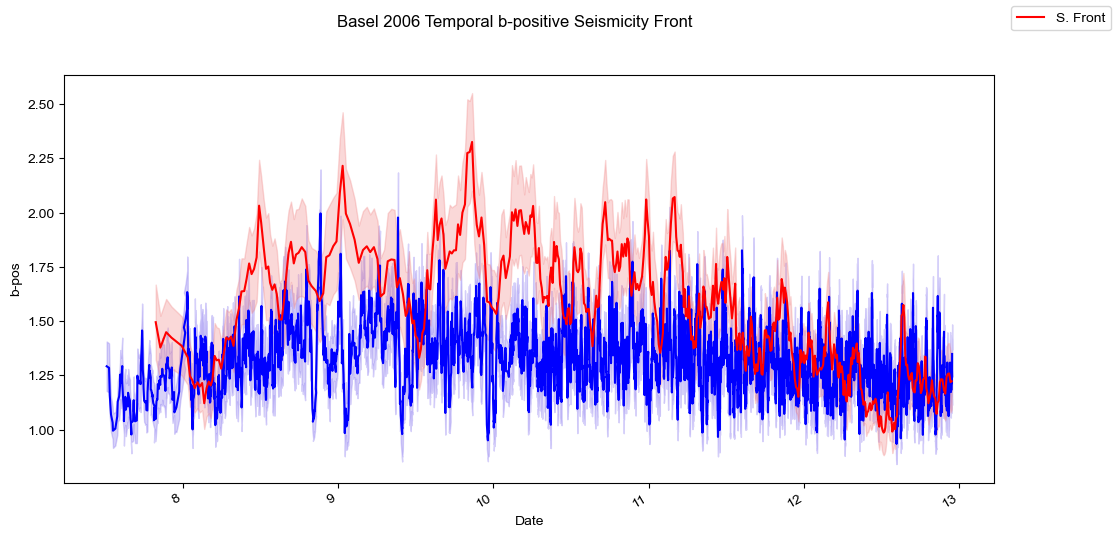

In [51]:
fig, ax1 = plt.subplots(figsize=(12,6))
fig.suptitle("Basel 2006 Temporal b-positive Seismicity Front")
ax1.plot(rdtr,rbp,color="blue")
ax1.fill_between(rdtr, np.subtract(rbp,rstdp), np.add(rbp,rstdp), alpha = 0.3, color = 'mediumslateblue')
ax1.plot(pdtr,pbp,color="red", label='S. Front')
ax1.fill_between(pdtr, np.subtract(pbp,pstdp), np.add(pbp,pstdp), alpha = 0.3, color = 'lightcoral')
#ax1.set_xlim([2,20])
#ax1.set_ylim([1,2])
fig.autofmt_xdate()
ax1.set_ylabel('b-pos')
ax1.set_xlabel('Date')
#fig.autofmt_xdate()
fig.legend(loc = 'upper right')
plt.show()

In [47]:
print(rdtr)

[7.510393518518518, 7.525578703703704, 7.53, 7.530266203703704, 7.538090277777778, 7.5446875, 7.548761574074074, 7.551053240740741, 7.566863425925926, 7.566782407407407, 7.578518518518519, 7.580393518518519, 7.581608796296297, 7.590983796296296, 7.596180555555556, 7.597847222222223, 7.6034375, 7.610625, 7.609895833333334, 7.615520833333333, 7.621365740740741, 7.621527777777778, 7.624618055555556, 7.630752314814814, 7.63019675925926, 7.6338078703703705, 7.640266203703704, 7.640231481481481, 7.646365740740741, 7.648773148148148, 7.648240740740741, 7.652719907407407, 7.660243055555555, 7.660254629629629, 7.665729166666667, 7.669479166666667, 7.667118055555555, 7.678576388888889, 7.680497685185185, 7.684328703703704, 7.685162037037037, 7.690300925925926, 7.693078703703704]


In [22]:
pbp=[]
plbp=[]
phbp=[]
pstdp=[]
pb=[]
plb=[]
phb=[]
pstd=[]
pdtr=[]

quicksort_with_swaps(percT,percM,0,len(percT)-1)
for i in range(1000,len(percM),100):
    #print(i)
    mxt=[]
    md=0
    for x in range(i-1000,i):
        mxt.append(percM[x])
    mxT=np.array(mxt)
    b, Mc, hist = b_value_functions.btrad(mxT, bins, delta_b = 0.01)
    hist1, bP = b_value_functions.bpos(mxT)
    low_b, high_b, std = b_value_functions.bootstrap(mxT, np.arange(-2, 6, 0.1), 1000, 'btrad', delta_b = 0.00001)    
    low_bp, high_bp, stdp = b_value_functions.bootstrap(mxT, np.arange(-2, 6, 0.1), 1000, 'bpos', delta_b = 0.00001)
    pb.append(b)
    pdtr.append(percT[i])
    pbp.append(bP)
    plb.append(low_b)
    plbp.append(low_bp)
    phb.append(high_b)
    phbp.append(high_bp)
    pstd.append(std)
    pstdp.append(stdp)

In [23]:
rbp=[]
rlbp=[]
rhbp=[]
rstdp=[]
rb=[]
rlb=[]
rhb=[]
rstd=[]
rdtr=[]
print(len(rstM))

quicksort_with_swaps(rstT,rstM,0,len(rstT)-1)
for i in range(1000,len(rstM),1000):
    #print(i)
    mxt=[]
    md=0
    for x in range(i-1000,i):
        mxt.append(rstM[x])
    mxT=np.array(mxt)
    b, Mc, hist = b_value_functions.btrad(mxT, bins, delta_b = 0.01)
    hist1, bP = b_value_functions.bpos(mxT)
    low_b, high_b, std = b_value_functions.bootstrap(mxT, np.arange(-2, 6, 0.1), 1000, 'btrad', delta_b = 0.00001)    
    low_bp, high_bp, stdp = b_value_functions.bootstrap(mxT, np.arange(-2, 6, 0.1), 1000, 'bpos', delta_b = 0.00001)
    rb.append(b)
    rdtr.append(rstT[i])
    rbp.append(bP)
    rlb.append(low_b)
    rlbp.append(low_bp)
    rhb.append(high_b)
    rhbp.append(high_bp)
    rstd.append(std)
    rstdp.append(stdp)

143685


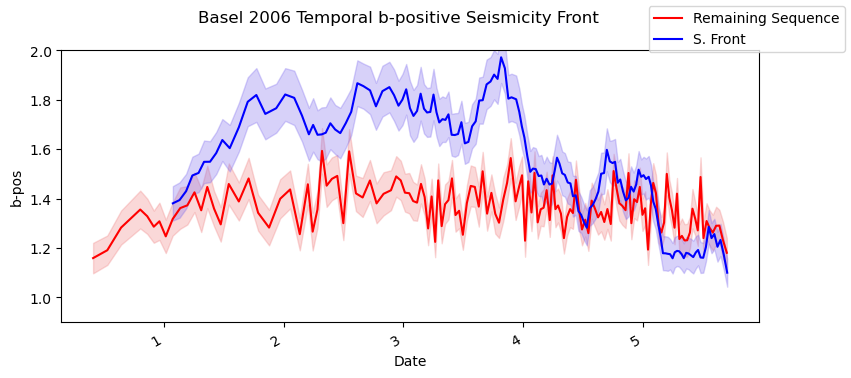

In [24]:
fig, ax1 = plt.subplots(figsize=(9,4))
fig.suptitle("Basel 2006 Temporal b-positive Seismicity Front")
ax1.plot(rdtr,rbp,color="red",label='Remaining Sequence')
ax1.fill_between(rdtr, np.subtract(rbp,rstdp), np.add(rbp,rstdp), alpha = 0.3, color = 'lightcoral')
ax1.plot(pdtr,pbp,color="blue", label='S. Front')
ax1.fill_between(pdtr, np.subtract(pbp,pstdp), np.add(pbp,pstdp), alpha = 0.3, color = 'mediumslateblue')
#ax1.vlines(mD,ymin=0.9,ymax=2.1,color='k',linestyle='--',label='Sequence Max')
#ax1.set_xlim([2,20])
ax1.set_ylim([0.9,2.0])
fig.autofmt_xdate()
ax1.set_ylabel('b-pos')
ax1.set_xlabel('Date')
fig.autofmt_xdate()
fig.legend(loc = 'upper right')
plt.show()

In [29]:
stDat= datetime(2006,11,25,11,36,6)
rdtrNew = [(dt-stDat).total_seconds()/86400.0 for dt in rdtr]
pdtrNew = [(dt-stDat).total_seconds()/86400.0 for dt in pdtr]

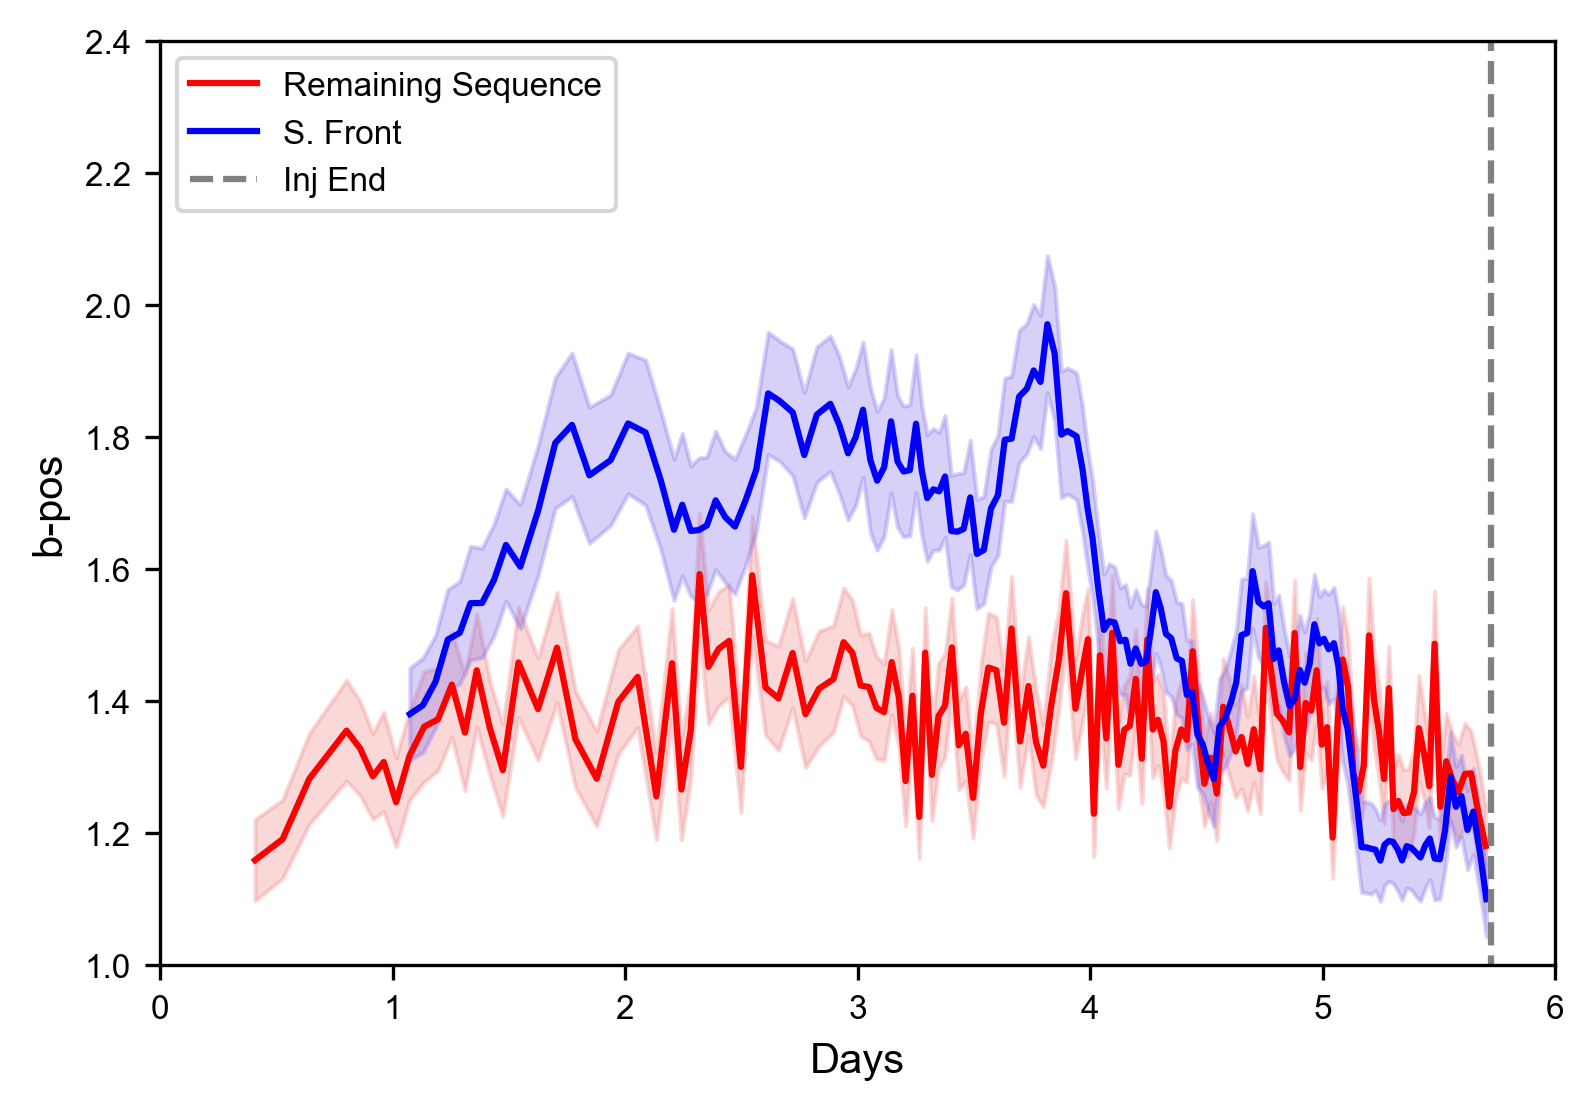

In [44]:
fig, ax1 = plt.subplots(figsize=(6,4),dpi=300)
plt.rcParams['font.family'] = 'Arial'
#fig.suptitle("Basel 2006 Temporal b-positive Seismicity Front")
ax1.plot(rdtr,rbp,color="red",label='Remaining Sequence')
ax1.fill_between(rdtr, np.subtract(rbp,rstdp), np.add(rbp,rstdp), alpha = 0.3, color = 'lightcoral')
ax1.plot(pdtr,pbp,color="blue", label='S. Front')
ax1.fill_between(pdtr, np.subtract(pbp,pstdp), np.add(pbp,pstdp), alpha = 0.3, color = 'mediumslateblue')
ax1.vlines(injEnd,0.7,3.6,colors='grey',linestyles='--',label='Inj End')
ax1.set_xlim([0,6])
ax1.set_ylim([1,2.4])
#fig.autofmt_xdate()
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
ax1.set_ylabel('b-pos',fontsize=10)
ax1.set_xlabel('Days',fontsize=10)
#fig.autofmt_xdate()
plt.legend(loc = 'upper left',fontsize=8)
plt.show()
fig.savefig(r"D:\Yihe\Manuscripting\Basel Figures\basel sf fig.png",bbox_inches='tight', pad_inches=0.05)

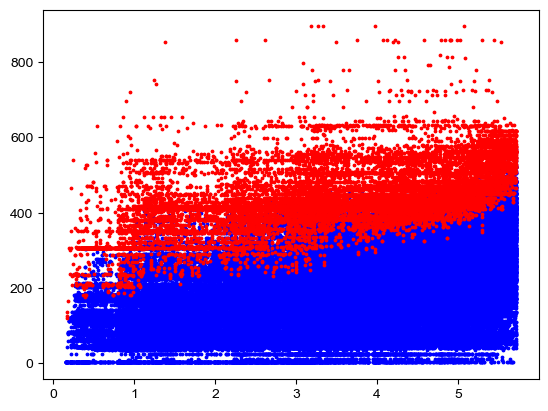

In [34]:
plt.scatter(rstT,rstD,c='b',s=3)
plt.scatter(percT,percD,c='r',s=3)

plt.show()

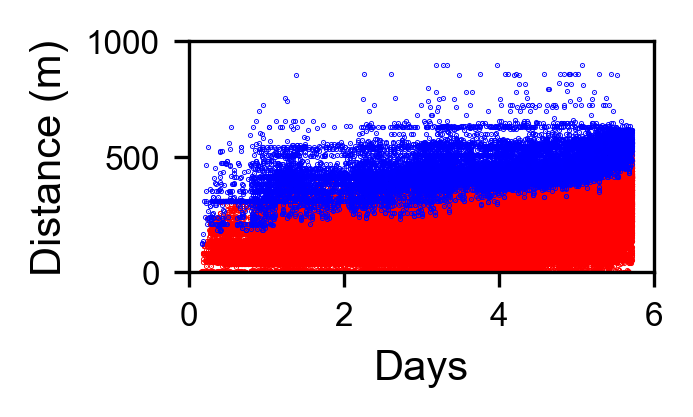

In [42]:
#stDat= datetime(2006,11,25,11,36,6)

fig, ax1 = plt.subplots(figsize=(2,1),dpi=300)

plt.scatter(rstT,rstD,c='r',s=0.05)
plt.scatter(percT,percD,c='b',s=0.05,label='Seismicity Front')
#plt.title("Schematic Seismicity Fronts Based Off SSFS 1993",size=15)
plt.xlabel("Days",fontsize=10)
plt.ylabel("Distance (m)",fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlim(0,6)
plt.ylim(0,1000)
#plt.legend(fontsize=8)
plt.show()
#fig.savefig(r"D:\Yihe\Manuscripting\seismicity front fig.png",bbox_inches='tight', pad_inches=0.05)
fig.savefig(r"D:\Yihe\Manuscripting\Basel Figures\basel sf inset.png",bbox_inches='tight', pad_inches=0.05)

In [78]:
mM=-10
mD=0
for i in range(len(Mw)):
    if Mw[i]>mM:
        mM=Mw[i]
        mD=DT[i]
print(mM,mD)

3.14 2006-12-08 16:48:39


In [30]:
rstM1 = np.array(rstM)
b, Mc, hist = b_value_functions.btrad(rstM1, bins, delta_b = 0.01)
hist1, bP = b_value_functions.bpos(rstM1)
low_b, high_b, std = b_value_functions.bootstrap(rstM1, np.arange(-2, 6, 0.1), 1000, 'btrad', delta_b = 0.01)    
low_bp, high_bp, stdp = b_value_functions.bootstrap(rstM1, np.arange(-2, 6, 0.1), 1000, 'bpos', delta_b = 0.01)
print(b,low_b,high_b, std)
print(bP,low_bp,high_bp, stdp)

1.2018406874182317 1.1937102743610997 1.2094393791779676 0.004085298497662186
1.3594128573555144 1.347251856632742 1.371445666726895 0.006103226823940766


1.2018406874182317 1.1937102743610997 1.2094393791779676 0.004085298497662186
1.3594128573555144 1.347251856632742 1.371445666726895 0.006103226823940766

In [31]:
percM1 = np.array(percM)
b, Mc, hist = b_value_functions.btrad(percM1, bins, delta_b = 0.01)
hist1, bP = b_value_functions.bpos(percM1)
low_b, high_b, std = b_value_functions.bootstrap(percM1, np.arange(-2, 6, 0.1), 1000, 'btrad', delta_b = 0.01)    
low_bp, high_bp, stdp = b_value_functions.bootstrap(percM1, np.arange(-2, 6, 0.1), 1000, 'bpos', delta_b = 0.01)
print(b,low_b,high_b, std)
print(bP,low_bp,high_bp, stdp)

1.3602655203294842 1.3331762970162861 1.4166934980157888 0.020949700549492873
1.4673391536518798 1.426452316468547 1.508793319976893 0.020884687440035236


1.3602655203294842 1.3331762970162861 1.4166934980157888 0.020949700549492873
1.4673391536518798 1.426452316468547 1.508793319976893 0.020884687440035236

In [50]:
"""
90% bv
rst 1.1850276046931087 1.1933133002755056 1.2087580614338906 0.0038221252360919732
perc 1.2949405714652367 1.292120014148947 1.3561396353417254 0.016212136399736662
bp
rst 1.3246792631027724 1.314574160890382 1.3351375595800665 0.005366026016972869
perc 1.391706453235273 1.3614293047415342 1.4245388942736616 0.016283752856525203

80% bv
rst 1.3096220785625214 1.294274856638135 1.3775729081206578 0.02051358006211117
perc 1.2685991521670144 1.2194895229175675 1.3551233867886179 0.035132331277061654
bp
rst 1.4725811903218917 1.4194013638170513 1.5318854898250773 0.02781818719631678
perc 1.524264755426455 1.4184771932101496 1.6293811698830436 0.052606944268569704
"""

# Newwww

"""
90% bv
rst 1.202880265348286 1.1953589430879852 1.2115840689311206 0.00405866379246819
perc 1.3703014307100172 1.3395312971439934 1.4027694359564178 0.015824225375159817
bp
rst 1.365395334355956 1.3535491894186642 1.3771369201521866 0.005927915808981394
perc 1.450874575357928 1.4146558623136525 1.4920696884825988 0.020193063834058653

80% bv
rst 1.3096220785625214 1.294274856638135 1.3775729081206578 0.02051358006211117
perc 1.2685991521670144 1.2194895229175675 1.3551233867886179 0.035132331277061654
bp
rst 1.4725811903218917 1.4194013638170513 1.5318854898250773 0.02781818719631678
perc 1.524264755426455 1.4184771932101496 1.6293811698830436 0.052606944268569704
"""

Me


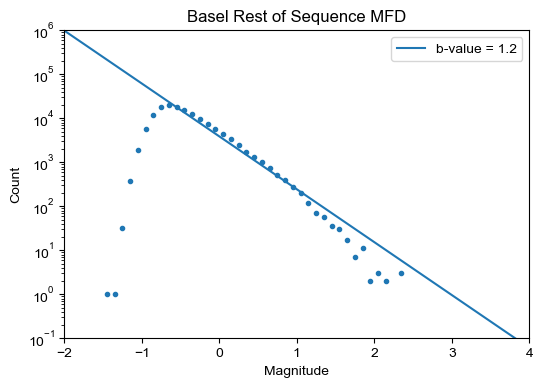

In [32]:
bins = np.arange(-2, 6, 0.1)
b, Mc, hist = b_value_functions.btrad(rstM1, bins, delta_b = 0.01)
x = bins
y_Mc = hist[0][np.argmax(hist[0])+2]
a = np.log10(y_Mc) + b*Mc

best_fit = 10**(a-b*x)

mid_bins = (bins[:-1] + bins[1:])/2

# Plot results 
figure = plt.figure(figsize = [6,4])
ax1 = figure.add_subplot(111)

ax1.scatter(mid_bins, hist[0], marker = '.')
ax1.plot(x, best_fit, label = 'b-value = '+str(np.round(b,2)))

ax1.set_xlim([-2, 4])
ax1.set_ylim([10**-1, 10**6])

ax1.set_yscale('log')
ax1.legend(loc = 'upper right')

ax1.set_xlabel('Magnitude')
ax1.set_ylabel('Count')
ax1.set_title('Basel Rest of Sequence MFD')
plt.show()

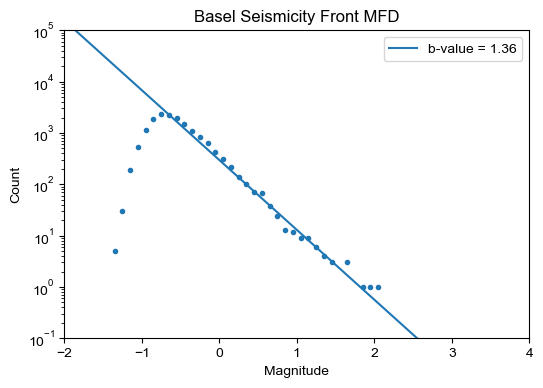

In [33]:
bins = np.arange(-2, 6, 0.1)
b, Mc, hist = b_value_functions.btrad(percM1, bins, delta_b = 0.01)
x = bins
y_Mc = hist[0][np.argmax(hist[0])+2]
a = np.log10(y_Mc) + b*Mc

best_fit = 10**(a-b*x)

mid_bins = (bins[:-1] + bins[1:])/2

# Plot results 
figure = plt.figure(figsize = [6,4])
ax1 = figure.add_subplot(111)

ax1.scatter(mid_bins, hist[0], marker = '.')
ax1.plot(x, best_fit, label = 'b-value = '+str(np.round(b,2)))

ax1.set_xlim([-2, 4])
ax1.set_ylim([10**-1, 10**5])

ax1.set_yscale('log')
ax1.legend(loc = 'upper right')

ax1.set_xlabel('Magnitude')
ax1.set_ylabel('Count')
ax1.set_title('Basel Seismicity Front MFD')
plt.show()